In [4011]:
#import packages
import numpy as np 
import pandas as pd
from pandas import DataFrame 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [4013]:
#import medical_raw_data_spreadsheet into the enviorment
df = pd.read_excel("medical_raw_data.xlsx")

In [4015]:
#rename the first column to make it an index in the dataset. 
df.rename( columns={'Unnamed: 0':'index'}, inplace=True )
df['index'] = pd.Series(range(0,10000))

In [4017]:
#display all the columns in my spreadsheet with their respective data type:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

In [4019]:
#detect the columns with null values
pd.isnull(df).sum() 

index                    0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

In [4023]:
# Find duplicates in my DataFrame 
duplicate_counts = df.duplicated()
print("Number of Duplicates:", duplicate_counts) 
pd.set_option('display.max_rows', 10)  # Show a maximum of 10 rows

Number of Duplicates: 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [4025]:
#find the stats of my dataframe 
df.describe()

,index,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,Anxiety,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,10000.000000,10000.000000,9018.000000,9016.000000,8944.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,1.001400,0.398900,0.709137,0.322316,34.432082,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,1.008117,0.628505,0.454186,0.467389,26.287050,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,0.00000,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,0.000000,0.000000,0.000000,0.000000,1.001981,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2499.75000,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,0.000000,0.000000,0.000000,0.000000,7.911709,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4999.50000,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,1.000000,0.000000,1.000000,0.000000,34.446941,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7499.25000,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,2.000000,1.000000,1.000000,1.000000,61.124654,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9999.00000,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,5.000000,1.000000,1.000000,71.981486,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


(array([1880., 1858., 1094., 1113.,  739.,  126.,  145.,  154.,  157.,
         146.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

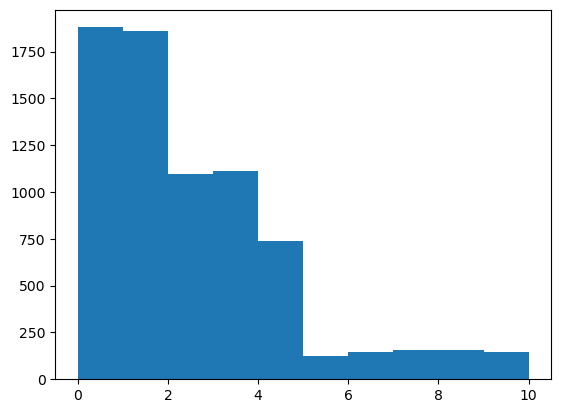

In [4027]:
#using histogram to detect distribution of the variables with missing values
#The childrens column in skewed to the left so we will use the median 
plt.hist(df['Children'])

(array([823., 761., 746., 753., 746., 739., 730., 765., 710., 813.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

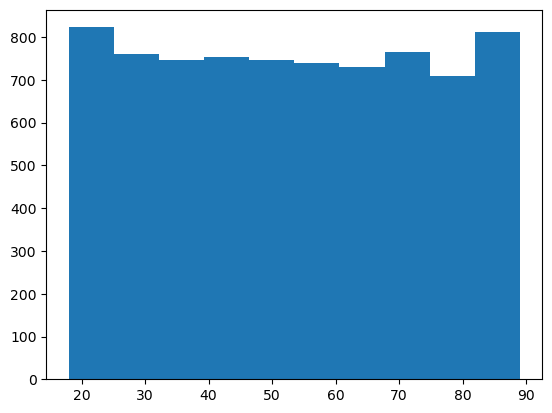

In [4029]:
#detecting histogram to detect distrubution
#this chart is a uniform distrubution so we can use mean
plt.hist(df['Age'])

(array([2068., 2526., 1532.,  790.,  340.,  156.,   67.,   34.,   12.,
          11.]),
 array([1.54080000e+02, 2.08635850e+04, 4.15730900e+04, 6.22825950e+04,
        8.29921000e+04, 1.03701605e+05, 1.24411110e+05, 1.45120615e+05,
        1.65830120e+05, 1.86539625e+05, 2.07249130e+05]),
 <BarContainer object of 10 artists>)

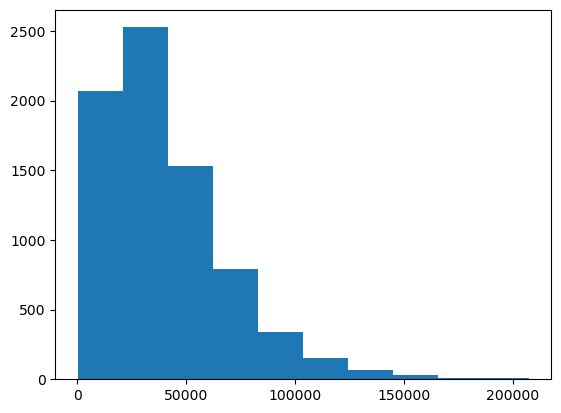

In [4031]:
#detecting histogram to detect distrubution
#this chart is skewed to the left  so we can use median
plt.hist(df['Income'])

(array([2623.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6395.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

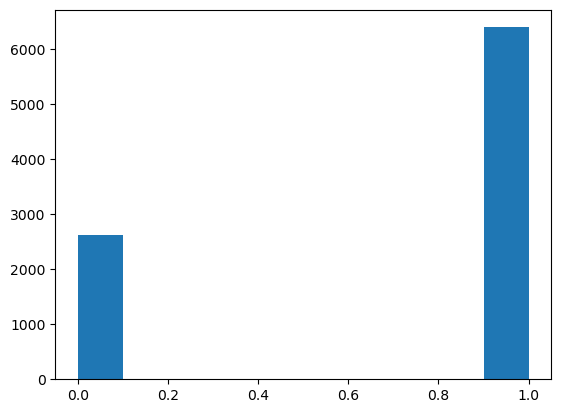

In [4033]:
#using histogram to detect distribution
#Overweight is a categorial variable so we will use mode to treat
plt.hist(df['Overweight'])

(array([6110.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2906.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

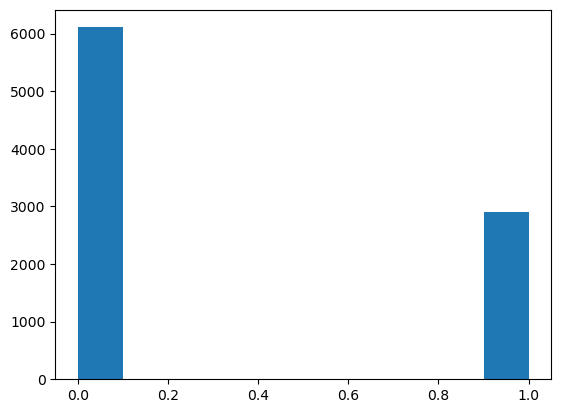

In [4035]:
#using histogram to detect distribution
#Anxiety is a categorial variable so we will use mode to treat
plt.hist(df['Anxiety'])

(array([2467.,    0.,    0.,    0.,    0., 5589.,    0.,    0.,    0.,
        1944.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

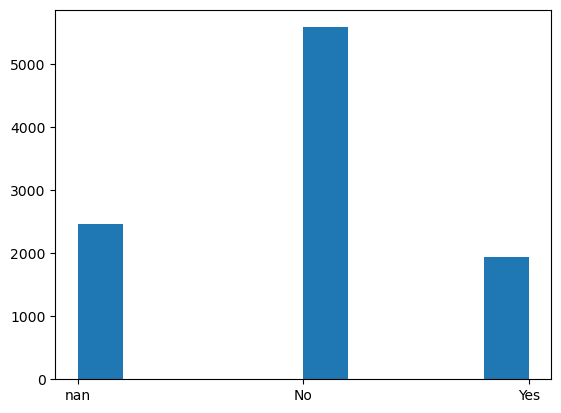

In [4039]:
#using histogram to detect distribution -because it's orignally a an object that we cant plot histograms on. First, the data type will be converted to a string then a histogram will be plotted.
#Soft_drink is a categorial variable so we will use mode to treat
df['Soft_drink'] = df['Soft_drink'].astype(str)
plt.hist(df['Soft_drink'])

(array([2288., 1429.,  599.,  134.,   32.,  235.,  502.,  916., 1314.,
        1495.]),
 array([ 1.00198092,  8.09993146, 15.197882  , 22.29583253, 29.39378307,
        36.49173361, 43.58968415, 50.68763469, 57.78558522, 64.88353576,
        71.9814863 ]),
 <BarContainer object of 10 artists>)

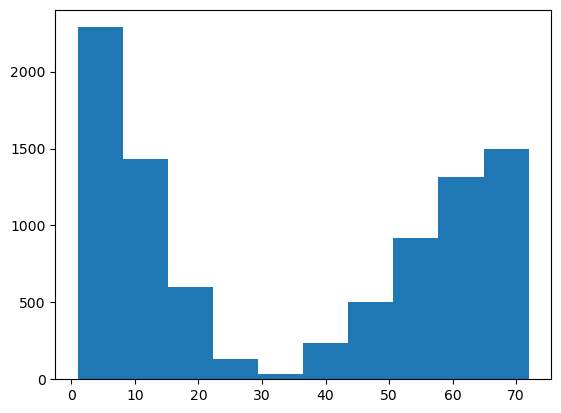

In [4041]:
#using histogram to detect distribution
#Initial days is an asymmetrical bi-modal distribution so we will use median to avoid bias from extremes 
plt.hist(df['Initial_days'])

In [4043]:
#treatment of missing values for Children
median_children = df['Children'].median()
df['Children'].fillna(median_children, inplace=True)

In [4045]:
#treatment of missing values for Age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [4047]:
#treatment of missing values for Income
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

In [4049]:
#treatment for missing values for Overweight to mode. 
mode_overweight = df['Overweight'].mode()[0] 

df['Overweight'].fillna(mode_overweight, inplace=True)

In [4051]:
#treatment for missing values for Anxiety 
mode_anxiety = df['Anxiety'].mode()[0]
df['Anxiety'].fillna(mode_anxiety, inplace=True)

In [4053]:
# Check the data type of 'Soft_drink'
print("Data type of 'Soft_drink':", df['Soft_drink'].dtype)

Data type of 'Soft_drink': object


In [4055]:
# Replace string 'nan' with actual NaN
df['Soft_drink'].replace('nan', np.nan, inplace=True)
# Calculate the mode of 'Soft_drink' column
mode_softdrink = df['Soft_drink'].mode()
# Fill NaN values in the 'Soft_drink' column with the mode
df['Soft_drink'].fillna(mode_value, inplace=True)

In [4057]:
df.Soft_drink.unique()

array(['No', 'Yes'], dtype=object)

In [4059]:
# Calculate mode of 'Intial_days' column
mode_intialdays = df['Initial_days'].median()

# Fill NaN values with the mode
df['Initial_days'].fillna(mode_intialdays, inplace=True)

In [4063]:
#rechecking the variables to detect anymore null values 
pd.isnull(df).sum()

index          0
CaseOrder      0
Customer_id    0
Interaction    0
UID            0
              ..
Item4          0
Item5          0
Item6          0
Item7          0
Item8          0
Length: 53, dtype: int64

<Axes: >

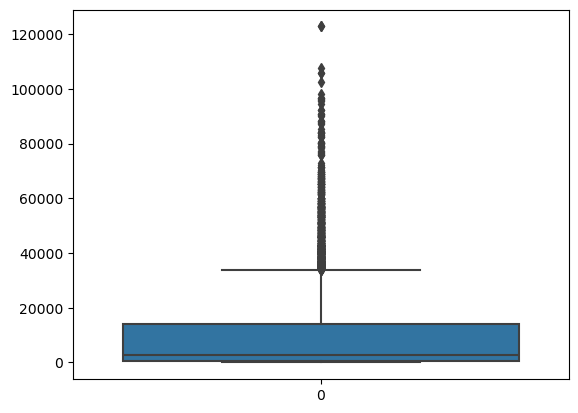

In [4065]:
#below is the boxplot for quantitative variables to detect outliers
#starting with the population variable 
sns.boxplot(df['Population'])

In [4067]:
# detect outliers on Population # In-Text Citation: (Polanitzer)
upper_limit = df['Population'].mean() + 3*df['Population'].std()
lower_limit = df['Population'].mean() - 3*df['Population'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 54439.52964287172
lower_limit: -34509.02204287172


In [4069]:
# Create a boolean mask for outliers
population_outliers_mask = (df['Population'] < lower_limit) | (df['Population'] > upper_limit)

# Count number of outliers using the mask
population_outliers = population_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", population_outliers)

Number of outliers: 218


In [4071]:
# Print all values from the 'Children' column of outliers
population_outliers_values = df.loc[population_outliers_mask, 'Population']
pd.set_option('display.max_rows', None)
print("Outlier values in the 'Population' column:")
print(population_outliers_values)

Outlier values in the 'Population' column:
153      56458
160      62718
163      60238
230      59191
243      65151
288      54453
336      54776
365      55361
393      69802
422      60191
469      68796
531      70199
591      59129
594      57955
611      90761
621      71587
657      63177
659      64197
690      64126
767     105799
793      69802
827      67040
882      71308
896      56446
920      60107
933      69685
964      54460
973      55130
981      55200
1002     67597
1017     66295
1049     58304
1056     64548
1066     62226
1087     56716
1093     55937
1124     67597
1158     55269
1182     58541
1229     57775
1231     68773
1318     56790
1436     63380
1470     76882
1609     68807
1688     59633
1879     63078
1882     59637
1890     67730
1897     68646
1913     58893
2064     68201
2245     92108
2484     55857
2497     71581
2511     59637
2540     57925
2541     60138
2558     72799
2728     80143
2742     75666
2863     58252
2888     82572
2905     764

<Axes: >

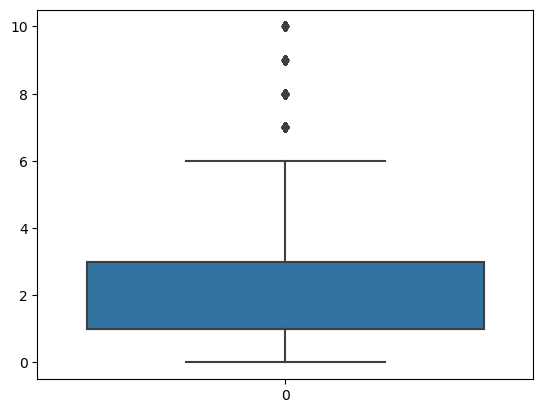

In [4073]:
#below is the boxplot for Children  to detect outliers
sns.boxplot(df['Children'])

In [4075]:
# detect outliers on Children
upper_limit = df['Children'].mean() + 3*df['Children'].std()
lower_limit = df['Children'].mean() - 3*df['Children'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 7.564908040851226
lower_limit: -3.9369080408512263


In [4077]:
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
children_outliers_mask = (df['Children'] < lower_limit) | (df['Children'] > upper_limit)

# Count number of outliers using the mask
children_outliers = children_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", children_outliers)

Number of outliers: 303


In [4079]:
# Print all values from the 'Children' column of outliers
children_outliers_values = df.loc[children_outliers_mask, 'Children']
pd.set_option('display.max_rows', None)
print("Outlier values in the 'Children' column:")
print(children_outliers_values)

Outlier values in the 'Children' column:
16      10.0
79       9.0
155      8.0
156     10.0
170      8.0
180     10.0
185     10.0
188      8.0
206      8.0
219     10.0
262      8.0
277      8.0
288      9.0
324      9.0
361      9.0
373      8.0
375      9.0
427      8.0
430      8.0
446     10.0
449      9.0
487      9.0
512      8.0
566      8.0
597     10.0
608      9.0
746      8.0
783      9.0
801     10.0
821      8.0
834      9.0
845      8.0
914      9.0
958      8.0
967      9.0
979      8.0
1001     8.0
1037     8.0
1047     8.0
1048     9.0
1075     8.0
1093    10.0
1138     8.0
1148     8.0
1168     8.0
1187     9.0
1328    10.0
1393    10.0
1435     8.0
1506     8.0
1535     8.0
1567     8.0
1585    10.0
1623    10.0
1633     8.0
1636     9.0
1721    10.0
1726     9.0
1752     8.0
1775    10.0
1821     8.0
1903     9.0
2054    10.0
2068     8.0
2106     8.0
2121    10.0
2124    10.0
2141     8.0
2149     8.0
2195    10.0
2281    10.0
2350     9.0
2376     8.0
2437     9

<Axes: >

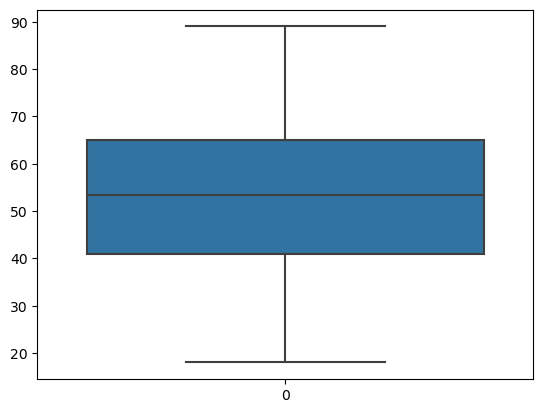

In [4081]:
#Plotting a boxplot for the Age variable to detect outliers 
sns.boxplot(df['Age'])

In [4083]:
# detect upper and lower limit on Age
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 107.27580225300791
lower_limit: -0.6844497615763458


In [4085]:
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
age_outliers_mask = (df['Age'] < lower_limit) | (df['Age'] > upper_limit)

# Count number of outliers using the mask
age_outliers = age_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", age_outliers)

Number of outliers: 0


<Axes: >

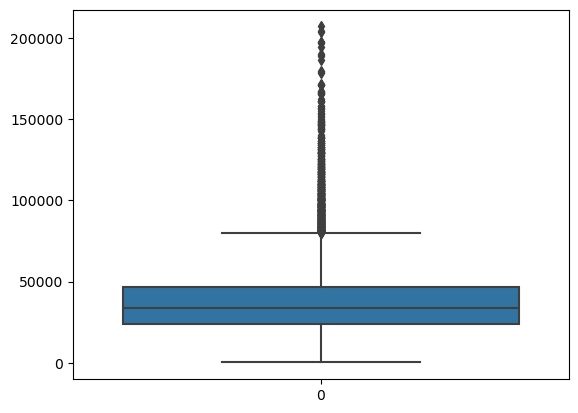

In [4087]:
#Plotting a boxplot for the Income variable to detect outliers 
sns.boxplot(df['Income'])

In [4089]:
#z-score method to detect outliers on Income
upper_limit = df['Income'].mean() + 3*df['Income'].std()
lower_limit = df['Income'].mean() - 3*df['Income'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 114000.83915851974
lower_limit: -36255.93821651973


In [4091]:
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
income_outliers_mask = (df['Income'] < lower_limit) | (df['Income'] > upper_limit)

# Count number of outliers using the mask
income_outliers = income_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", income_outliers)

Number of outliers: 180


In [4093]:
# Print all values from the 'Income' column of outliers
income_outliers_values = df.loc[income_outliers_mask, 'Income']

print("Outlier values in the 'Income' column:")
print(income_outliers_values)

Outlier values in the 'Income' column:
30      167105.10
36      122615.82
58      132963.95
63      128855.39
77      135288.23
86      114525.82
173     178470.63
180     128959.11
190     131682.02
219     146378.38
361     136468.34
417     132010.48
611     128108.35
622     171288.05
841     204542.41
895     116478.20
903     129098.71
917     129123.73
962     138456.69
984     116583.66
1073    120273.05
1095    116549.66
1105    120700.01
1108    167286.62
1341    129987.32
1372    127505.80
1471    147570.86
1514    121766.35
1533    116654.47
1590    158173.60
1665    119102.35
1677    117236.40
1723    148809.86
1778    197576.18
1800    133047.11
1938    118455.51
1979    127857.49
1998    131832.82
2016    133068.75
2036    131093.00
2044    165560.97
2064    116577.62
2071    154853.42
2072    147026.65
2120    120465.44
2234    130633.84
2336    132041.56
2374    133163.45
2445    118794.17
2449    124473.91
2454    138602.51
2507    114215.99
2641    156447.60
2778   

<Axes: >

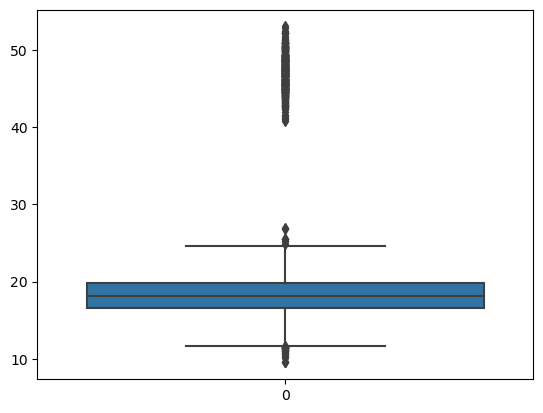

In [4095]:
#Plotting a boxplot for VitD levels 
sns.boxplot(df['VitD_levels'])

In [4097]:
#z-score method to detect outliers on VitD levels 
upper_limit = df['VitD_levels'].mean() + 3*df['VitD_levels'].std()
lower_limit = df['VitD_levels'].mean() - 3*df['VitD_levels'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 39.58250727200495
lower_limit: -0.757156480777148


In [4099]:
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
vitd_outliers_mask = (df['VitD_levels'] < lower_limit) | (df['VitD_levels'] > upper_limit)

# Count number of outliers using the mask
vitd_outliers = vitd_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", vitd_outliers)

Number of outliers: 500


In [4101]:
# Print all values from the 'Vitd levels' column of outliers
vitd_outliers_values = df.loc[vitd_outliers_mask, 'VitD_levels']

print("Outlier values in the 'VitD' column:")
print(vitd_outliers_values)

Outlier values in the 'VitD' column:
11      47.813476
94      49.256313
106     49.205398
147     47.757384
170     44.553973
219     49.804180
301     49.170736
306     47.779889
379     47.441605
425     48.274277
447     51.430034
471     49.655059
514     50.859496
527     50.383837
551     47.278043
580     52.063590
633     45.876363
659     46.728198
664     49.048269
669     47.577259
677     43.166097
699     45.186680
700     45.586737
710     47.700790
726     47.776606
734     48.643307
763     47.636862
786     41.071664
814     48.086528
837     44.320626
848     45.897569
906     44.690182
912     46.694861
914     45.291119
928     47.211656
947     44.894950
960     46.790254
991     44.708834
1058    45.555535
1069    45.511174
1077    42.740746
1081    44.000344
1082    46.277890
1091    45.472825
1132    44.185447
1137    46.408789
1155    47.539720
1170    44.432400
1221    44.169235
1245    48.701910
1248    46.615347
1255    49.809996
1296    49.573759
1306    5

<Axes: >

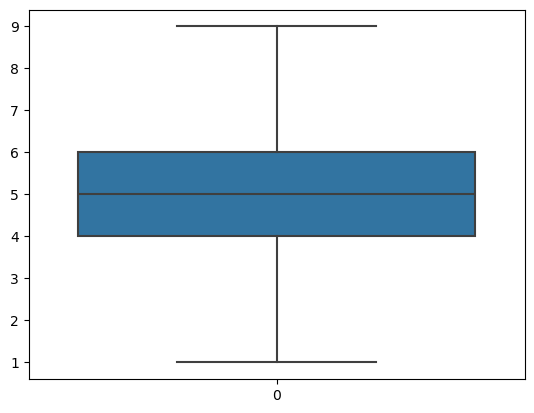

In [4103]:
#visualizing the number of Doc_visits to detect outliers
sns.boxplot(df['Doc_visits'])

In [4105]:
# detect outliers on Doc visits 
upper_limit = df['Doc_visits'].mean() + 3*df['Doc_visits'].std()
lower_limit = df['Doc_visits'].mean() - 3*df['Doc_visits'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 8.14940331576761
lower_limit: 1.8749966842323893


In [4107]:
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
doc_outliers_mask = (df['Doc_visits'] < lower_limit) | (df['Doc_visits'] > upper_limit)

# Count number of outliers using the mask
doc_outliers = doc_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", doc_outliers)

Number of outliers: 8


In [4109]:
# Print all values from the 'Doc_visits' column of outliers
doc_outliers_values = df.loc[doc_outliers_mask, 'Doc_visits']

print("Outlier values in the 'Doc_visitsn' column:")
print(doc_outliers_values)

Outlier values in the 'Doc_visitsn' column:
962     9
2766    9
5645    1
5756    1
6017    1
6498    1
6942    1
7143    1
Name: Doc_visits, dtype: int64


<Axes: >

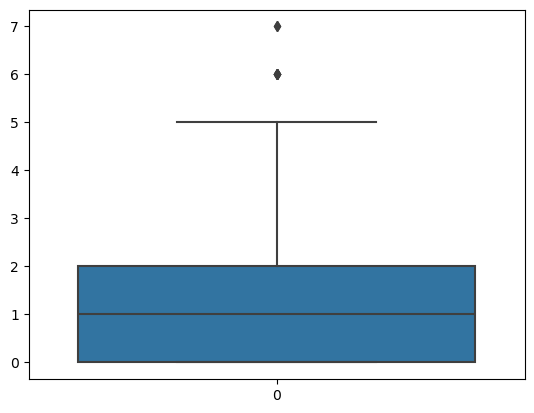

In [4111]:
#visualizing the number of full meals eaten to dectect outliers 
sns.boxplot(df['Full_meals_eaten'])

In [4113]:
#method to detect outliers on Full meals eaten
upper_limit = df['Full_meals_eaten'].mean() + 3*df['Full_meals_eaten'].std()
lower_limit = df['Full_meals_eaten'].mean() - 3*df['Full_meals_eaten'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 4.0257506790224005
lower_limit: -2.0229506790224008


In [4115]:
# Create a boolean mask for outliers
fmeals_outliers_mask = (df['Full_meals_eaten'] < lower_limit) | (df['Full_meals_eaten'] > upper_limit)

# Count number of outliers using the mask
fmeals_outliers = fmeals_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", fmeals_outliers)

Number of outliers: 33


In [4117]:
# Print all values from the 'Full meals eaten' column of outliers
fmeals_outliers_values = df.loc[fmeals_outliers_mask, 'Full_meals_eaten']

print("Outlier values in the 'Full meals eaten' column:")
print(fmeals_outliers_values)

Outlier values in the 'Full meals eaten' column:
550     5
697     5
958     7
1148    5
1231    6
1456    5
2184    6
2315    5
2652    5
2746    5
2877    5
2919    5
4345    5
4709    7
4902    5
5367    5
5543    5
5597    5
5711    5
5859    5
6026    5
6068    6
6083    5
6694    5
6802    5
7217    6
8144    6
8326    5
8902    5
8994    5
9067    5
9220    5
9986    6
Name: Full_meals_eaten, dtype: int64


<Axes: >

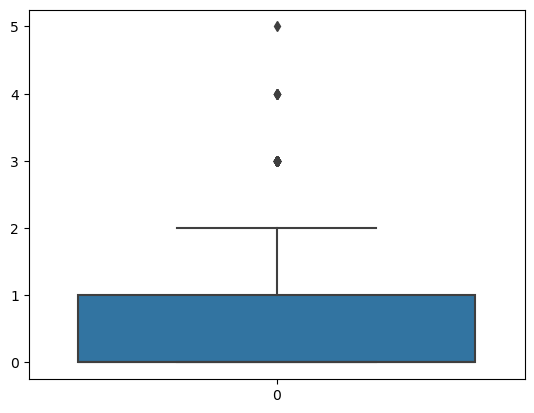

In [4119]:
#plotting the boxplot for VItD supp 
sns.boxplot(df['VitD_supp'])

In [4121]:
#z-score method to detect outliers on VitD_supp
upper_limit = df['VitD_supp'].mean() + 3*df['VitD_supp'].std()
lower_limit = df['VitD_supp'].mean() - 3*df['VitD_supp'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 2.2844144195850116
lower_limit: -1.4866144195850117


In [4123]:
# Create a boolean mask for outliers# In-Text Citation: (Polanitzer)
vitds_outliers_mask = (df['VitD_supp'] < lower_limit) | (df['VitD_supp'] > upper_limit)

# Count number of outliers using the mask
vitds_outliers = vitds_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", vitds_outliers)

Number of outliers: 70


In [4125]:
# Print all values from the 'VitD supp' column of outliers
vitds_outliers_values = df.loc[vitds_outliers_mask, 'VitD_supp']

print("Outlier values in the 'Vitamin D Supp' column:")
print(vitds_outliers_values)

Outlier values in the 'Vitamin D Supp' column:
62      3
63      3
206     3
249     3
837     3
1048    3
1342    4
1473    3
1660    3
1675    3
1712    3
1752    3
2128    3
2151    3
2308    3
2358    3
2533    4
2715    4
2956    3
3131    5
3215    3
3262    3
3493    3
3627    3
3814    3
3900    3
4002    3
4068    3
4158    3
4163    3
4296    3
4398    3
4406    3
4567    3
4844    3
4860    3
4999    3
5044    3
5216    3
5351    3
5533    3
5583    3
6216    3
6384    3
6415    3
6524    3
6732    3
7149    3
7180    4
7215    3
7217    3
7343    3
7412    3
7471    3
7473    3
7706    3
7889    3
8069    3
8245    3
8299    3
8349    3
8405    3
8493    3
8652    3
9015    3
9091    4
9589    3
9790    3
9908    3
9982    3
Name: VitD_supp, dtype: int64


<Axes: >

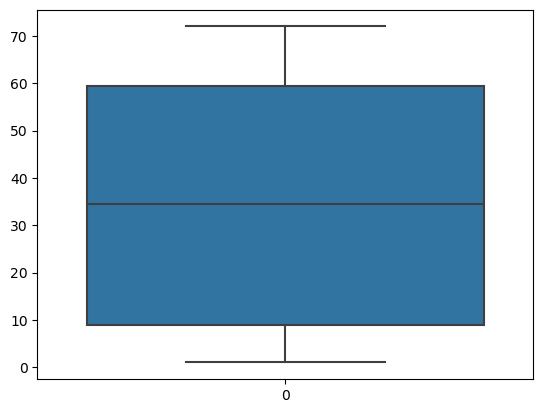

In [4127]:
#Intial days boxplot to visualize outliers
sns.boxplot(df['Initial_days'])

In [4129]:
# detect outliers on Initial days
upper_limit = df['Initial_days'].mean() + 3*df['Initial_days'].std()
lower_limit = df['Initial_days'].mean() - 3*df['Initial_days'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 109.01434825002877
lower_limit: -40.147046168249375


In [4131]:
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
initial_outliers_mask = (df['Initial_days'] < lower_limit) | (df['Initial_days'] > upper_limit)

# Count number of outliers using the mask
initial_outliers = initial_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", initial_outliers)

Number of outliers: 0


<Axes: >

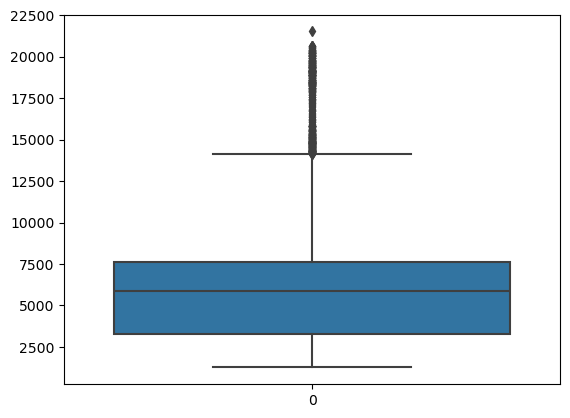

In [4133]:
#detect outliers using a boxplot for totalcharge 
sns.boxplot(df['TotalCharge'])

In [4135]:
#z-score method to detect outliers on Total Charge
upper_limit = df['TotalCharge'].mean() + 3*df['TotalCharge'].std()
lower_limit = df['TotalCharge'].mean() - 3*df['TotalCharge'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)

upper_limit: 16024.212670374412
lower_limit: -4241.136147448013


In [4137]:
# Create a boolean mask for outliers  # In-Text Citation: (Polanitzer)
totalcharge_outliers_mask = (df['TotalCharge'] < lower_limit) | (df['TotalCharge'] > upper_limit) 
# Count number of outliers using the mask
totalcharge_outliers = totalcharge_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", totalcharge_outliers)

Number of outliers: 276


In [4139]:
# Print all values from the 'Total charge' column of outliers
totalcharge_outliers_values = df.loc[totalcharge_outliers_mask, 'TotalCharge']

print("Outlier values in the 'Total Charge' column:")
print(totalcharge_outliers_values)

Outlier values in the 'Total Charge' column:
527     16053.46288
1376    17363.11201
1761    16538.02500
1790    16381.50104
1798    17194.57712
1847    16153.98925
1963    16194.01407
2557    16964.31623
2626    16242.00966
2838    17469.99434
2999    16173.61648
3048    16767.47866
3192    16417.00091
3350    16057.31330
3495    16223.41935
3773    16586.74536
4683    16858.21041
4775    16351.26318
4973    16509.13363
5010    19429.73514
5011    17927.54626
5043    19129.30875
5044    19157.64471
5057    19548.93859
5064    19930.25513
5121    18532.83052
5128    19201.61096
5144    18429.10924
5156    19719.67627
5160    20044.52896
5179    17450.81833
5194    19101.58205
5215    18022.74793
5230    18590.72573
5244    20647.38602
5246    19404.98558
5286    19303.24743
5294    20146.04563
5323    18575.97115
5324    19224.18215
5359    19556.20709
5387    18011.04878
5388    17259.67830
5421    19702.13635
5441    19894.93763
5453    20632.44185
5483    19367.21187
5486    17924.8

<Axes: >

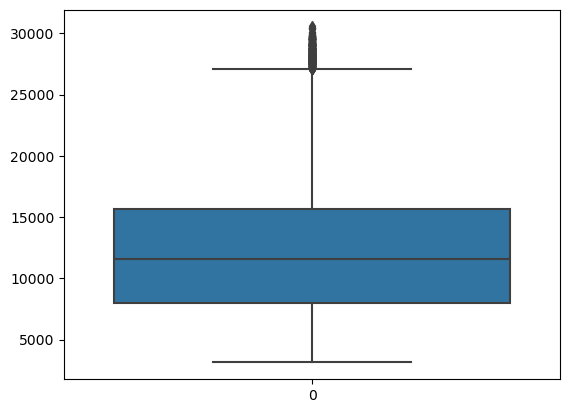

In [4141]:
#Plotting a boxplot to to detect outliers on Additional charges 
sns.boxplot(df['Additional_charges'])

In [4143]:
#z-score method to detect outliers on Additional Charges
upper_limit = df['Additional_charges'].mean() + 3*df['Additional_charges'].std()
lower_limit = df['Additional_charges'].mean() - 3*df['Additional_charges'].std()
print('upper_limit:', upper_limit)
print('lower_limit:', lower_limit)
# Create a boolean mask for outliers # In-Text Citation: (Polanitzer)
additionalcharge_outliers_mask = (df['Additional_charges'] < lower_limit) | (df['Additional_charges'] > upper_limit) 
# Count number of outliers using the mask
additionalcharge_outliers = additionalcharge_outliers_mask.sum()  # sum() counts True values in the mask

print("Number of outliers:", additionalcharge_outliers)

upper_limit: 32562.333218481188
lower_limit: -6693.276047293986
Number of outliers: 0


In [4145]:
#checking qualitative variables for their distinct categories or values that the variable contains
df.Area.unique()

array(['Suburban', 'Urban', 'Rural'], dtype=object)

In [4147]:
df.Timezone.unique()

array(['America/Chicago', 'America/New_York', 'America/Los_Angeles',
       'America/Indiana/Indianapolis', 'America/Detroit',
       'America/Denver', 'America/Nome', 'America/Anchorage',
       'America/Phoenix', 'America/Boise', 'America/Puerto_Rico',
       'America/Yakutat', 'Pacific/Honolulu', 'America/Menominee',
       'America/Kentucky/Louisville', 'America/Indiana/Vincennes',
       'America/Toronto', 'America/Indiana/Marengo',
       'America/Indiana/Winamac', 'America/Indiana/Tell_City',
       'America/Sitka', 'America/Indiana/Knox',
       'America/North_Dakota/New_Salem', 'America/Indiana/Vevay',
       'America/Adak', 'America/North_Dakota/Beulah'], dtype=object)

In [4149]:
df.Education.unique()

array(['Some College, Less than 1 Year',
       'Some College, 1 or More Years, No Degree',
       'GED or Alternative Credential', 'Regular High School Diploma',
       "Bachelor's Degree", "Master's Degree",
       'Nursery School to 8th Grade',
       '9th Grade to 12th Grade, No Diploma', 'Doctorate Degree',
       "Associate's Degree", 'Professional School Degree',
       'No Schooling Completed'], dtype=object)

In [4151]:
df.Employment.unique()

array(['Full Time', 'Retired', 'Unemployed', 'Student', 'Part Time'],
      dtype=object)

In [4153]:
df.Marital.unique()

array(['Divorced', 'Married', 'Widowed', 'Never Married', 'Separated'],
      dtype=object)

In [4155]:
df.ReAdmis.unique()

array(['No', 'Yes'], dtype=object)

In [4157]:
df.Soft_drink.unique()

array(['No', 'Yes'], dtype=object)

In [4159]:
df.Initial_admin.unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [4161]:
df.HighBlood.unique()

array(['Yes', 'No'], dtype=object)

In [4163]:
df.Stroke.unique()

array(['No', 'Yes'], dtype=object)

In [4165]:
df.Complication_risk.unique()

array(['Medium', 'High', 'Low'], dtype=object)

In [4167]:
# Convert 'Overweight' column from float to string
df['Overweight'] = df['Overweight'].astype(str)
# Check the updated data types
print(df.dtypes)

index                   int64
CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
Timezone               object
Job                    object
Children              float64
Age                   float64
Education              object
Employment             object
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis 

In [4169]:
df.Overweight.unique()

array(['0.0', '1.0'], dtype=object)

In [4171]:
df.Arthritis.unique()

array(['Yes', 'No'], dtype=object)

In [4173]:
df.Diabetes.unique()

array(['Yes', 'No'], dtype=object)

In [4175]:
df.Hyperlipidemia.unique()

array(['No', 'Yes'], dtype=object)

In [4177]:
df.BackPain.unique()

array(['Yes', 'No'], dtype=object)

In [4179]:
df.Anxiety.unique()

array([1., 0.])

In [4181]:
df.Allergic_rhinitis.unique()

array(['Yes', 'No'], dtype=object)

In [4183]:
df.Reflux_esophagitis.unique()

array(['No', 'Yes'], dtype=object)

In [4185]:
df.Asthma.unique()

array(['Yes', 'No'], dtype=object)

In [4187]:
df.Services.unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [4189]:
df.Item1.unique()

array([3, 2, 4, 1, 5, 7, 6, 8], dtype=int64)

In [4191]:
df.Item2.unique()

array([3, 4, 5, 1, 2, 6, 7], dtype=int64)

In [4193]:
df.Item3.unique()

array([2, 3, 4, 5, 1, 6, 7, 8], dtype=int64)

In [4195]:
df.Item4.unique()

array([2, 4, 3, 5, 6, 1, 7], dtype=int64)

In [4197]:
df.Item5.unique()

array([4, 3, 5, 2, 6, 1, 7], dtype=int64)

In [4199]:
df.Item6.unique()

array([3, 4, 5, 2, 6, 1, 7], dtype=int64)

In [4201]:
df.Item7.unique()

array([3, 5, 4, 2, 6, 1, 7], dtype=int64)

In [4203]:
df.Item8.unique()

array([4, 3, 5, 6, 2, 1, 7], dtype=int64)

In [4205]:
#Re expressing the categorical values answered as Yes/No to numerical 0 & 1
# Convert 'ReAdmis' column using revalue() and as.numeric()
df['ReAdmis_num'] = df['ReAdmis']
dict = {"ReAdmis_num":{ "Yes": 1, "No": 0}}
df.replace(dict, inplace=True)

In [4207]:
df['Soft_drink_num'] = df['Soft_drink']
softdrink_dict = {"Soft_drink_num":{"Yes": 1, "No": 0}}
df.replace(softdrink_dict, inplace=True)

In [4209]:
df['HighBlood_num'] = df['HighBlood']
highblood_dict = {"HighBlood_num":{"Yes": 1, "No": 0}}
df.replace(highblood_dict, inplace=True)

In [4211]:
df['Stroke_num'] = df['Stroke']
stroke_dict = {"Stroke_num":{"Yes": 1, "No": 0}}
df.replace(stroke_dict, inplace=True)

In [4213]:
# Define the replacement dictionary for 'Arthritis' column
arthritis_dict = {"Yes": 1, "No": 0}

# Create a new column 'Arthritis_num' with numeric values
df['Arthritis_num'] = df['Arthritis'].replace(arthritis_dict)

In [4215]:
# Define the replacement dictionary for 'Diabetes' column
diabetes_dict = {"Yes": 1, "No": 0}

# Create a new column 'Diabetes_num' with numeric values
df['Diabetes_num'] = df['Diabetes'].replace(diabetes_dict)

In [4217]:
# Define the replacement dictionary for 'Hyperlipidemia' column
hyperlipidemia_dict = {"Yes": 1, "No": 0}

# Create a new column 'Hyperlipidemia_num' with numeric values
df['Hyperlipidemia_num'] = df['Hyperlipidemia'].replace(hyperlipidemia_dict)

In [4219]:
# Define the replacement dictionary for 'BackPain' column
backpain_dict = {"Yes": 1, "No": 0}

# Create a new column 'BackPain_num' with numeric values
df['BackPain_num'] = df['BackPain'].replace(backpain_dict)

In [4221]:
# Define the replacement dictionary
allergic_dict = {"Yes": 1, "No": 0}

# Replace values in the column
df['Allergic_rhinitis_num'] = df['Allergic_rhinitis'].replace(allergic_dict)

In [4223]:
# Define the replacement dictionary for 'Reflux_esophagitis' column
reflux_dict = {"Yes": 1, "No": 0}

# Create a new column 'Reflux_esophagitis_num' with numeric values
df['Reflux_esophagitis_num'] = df['Reflux_esophagitis'].replace(reflux_dict)

In [4225]:
# Define the replacement dictionary for 'Asthma' column
asthma_dict = {"Yes": 1, "No": 0}

# Create a new column 'Asthma_num' with numeric values
df['Asthma_num'] = df['Asthma'].replace(asthma_dict)


In [4227]:
df.Asthma_num.unique()

array([1, 0], dtype=int64)

In [4229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   10000 non-null  int64  
 1   CaseOrder               10000 non-null  int64  
 2   Customer_id             10000 non-null  object 
 3   Interaction             10000 non-null  object 
 4   UID                     10000 non-null  object 
 5   City                    10000 non-null  object 
 6   State                   10000 non-null  object 
 7   County                  10000 non-null  object 
 8   Zip                     10000 non-null  int64  
 9   Lat                     10000 non-null  float64
 10  Lng                     10000 non-null  float64
 11  Population              10000 non-null  int64  
 12  Area                    10000 non-null  object 
 13  Timezone                10000 non-null  object 
 14  Job                     10000 non-null 

In [4231]:
# Drop multiple columns in-place
columns_to_drop = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 
                    'Diabetes', 'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 
                    'Reflux_esophagitis', 'Asthma']

df.drop(columns=columns_to_drop, inplace=True)

In [4233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   10000 non-null  int64  
 1   CaseOrder               10000 non-null  int64  
 2   Customer_id             10000 non-null  object 
 3   Interaction             10000 non-null  object 
 4   UID                     10000 non-null  object 
 5   City                    10000 non-null  object 
 6   State                   10000 non-null  object 
 7   County                  10000 non-null  object 
 8   Zip                     10000 non-null  int64  
 9   Lat                     10000 non-null  float64
 10  Lng                     10000 non-null  float64
 11  Population              10000 non-null  int64  
 12  Area                    10000 non-null  object 
 13  Timezone                10000 non-null  object 
 14  Job                     10000 non-null 

In [3896]:
# Round 'age' to the nearest whole number
df['Age'] = df['Age'].round().astype(int)

In [4235]:
#Export data set into an CSV 
#df.to_csv(r'C:\D206\output_data1.csv', index=False)

In [3872]:
print(df.head(5))

   index  CaseOrder Customer_id                           Interaction  \
0      0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1      1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2      2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3      3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4      4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat  ...  Soft_drink_num  HighBlood_num Stroke_num Arthritis_num  \
0  3

In [4237]:
# PCA df for quantitative variables:
p_df = df[['Population','Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','VitD_supp','Initial_days','TotalCharge','Additional_charges']]

In [4239]:
# 1. Calculate Mean and Standard Deviation
mean = p_df.mean()
std = p_df.std()
normalized_df = (p_df - mean) / std

In [4241]:
# Verify the number of columns
pca = PCA(p_df.shape[1])
print("Number of features (columns):", p_df.shape[1])

Number of features (columns): 11


In [4243]:
pca.fit(normalized_df)

PCA(n_components=11)

In [4245]:
p_pca = pd.DataFrame(pca.transform(normalized_df),
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11'])

In [4247]:
# 4. Create a DataFrame with principal components
p_pca = pd.DataFrame(pca.transform(normalized_df), columns=[f'PC{i+1}' for i in range(p_df.shape[1])])

print(p_pca.head(10))  # This will show the first 10 rows of the DataFrame with all columns

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.098324  0.637441  0.240137  1.752100 -0.167199 -0.092814 -0.522150   
1 -0.648772  0.548335 -0.330309  0.098459  0.859630 -0.888963  0.874991   
2 -1.405382  0.647868 -0.505399 -1.049011  0.394383  0.774128  1.085004   
3 -1.376965  1.144631 -1.109491 -0.340415 -0.687187 -0.330944  0.242246   
4 -1.797761 -1.993950  0.820922 -0.305366 -1.464935 -1.240279  2.145428   
5 -1.043891  0.997583 -0.288558  0.571227 -0.876637  0.580784  0.332227   
6 -1.342673  0.434839 -0.193091 -0.205583 -1.543273  0.794951  0.038440   
7 -0.632718 -1.006873 -0.512438  1.031646  2.320231  1.259187 -0.071928   
8 -1.206579 -0.529988 -0.505289  1.646624  0.054788  1.682046 -0.205655   
9 -0.670142  2.593074  0.956224  1.971184 -0.719129 -0.791340  1.317415   

        PC8       PC9      PC10      PC11  
0  1.163726 -1.345951  0.548678  0.023805  
1  0.039071  1.113168  0.573366 -0.017482  
2  0.381458  0.185217  0.500588  0.095345 


Eigenvalues:
[1.95137019 0.05356901 1.61883796 0.37835537 1.05422535 1.02252024
 0.96876577 0.97344998 0.97910595 0.99592418 1.003876  ]

PCA Explained Variance (Eigenvalues):
[1.95137019 1.61883796 1.05422535 1.02252024 1.003876   0.99592418
 0.97910595 0.97344998 0.96876577 0.37835537 0.05356901]


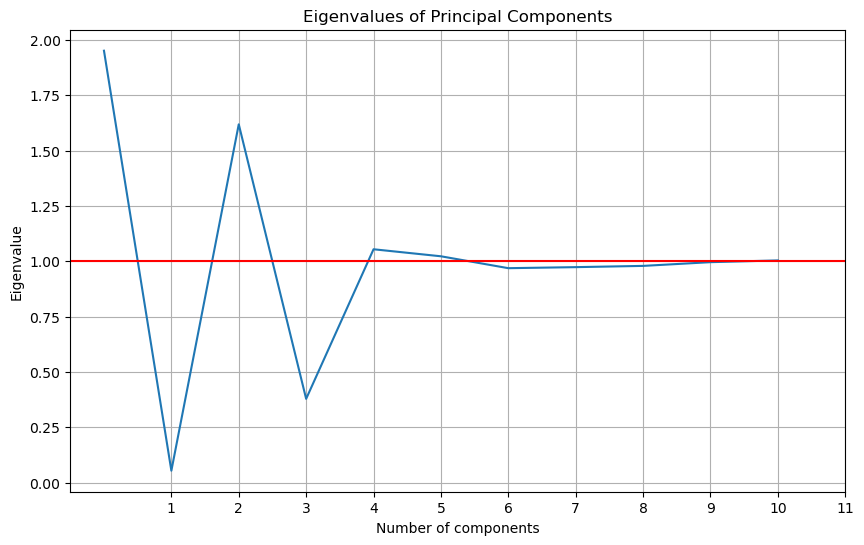

In [3926]:
# 2. Compute Covariance Matrix # In-Text Citation: (Kumar)
cov_matrix = normalized_df.cov()

# 3. Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)

# 4. Verify with PCA
pca = PCA(n_components=normalized_df.shape[1])
pca.fit(normalized_df)
pca_eigenvalues = pca.explained_variance_
print("\nPCA Explained Variance (Eigenvalues):")
print(pca_eigenvalues)

# 5. Plot Eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues)
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.grid(True)
plt.axhline(y = 1, color = "red")
plt.xticks(range(1, len(eigenvalues) + 1))
plt.show()